# Galxay evolution in dense environments

In [ ]:

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from google.colab import drive
import os
from astropy.table import Table
import math
from scipy.stats import chisquare
#import seaborn as sns
%matplotlib inline

# Passive and active galaxies in function of the environment

In [ ]:
drive.mount('/content/drive/', force_remount=True)
path = "/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 5"
os.listdir(path)

Mounted at /content/drive/


['Env_colors', 'Env_Qtime']

In [ ]:
env_colors=fits.open("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 5/Env_colors/SDSS_EnvCatalogue.fits")

In [ ]:
env_col_table = Table.read("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 5/Env_colors/SDSS_EnvCatalogue.fits")
#print(env_col_table)
print (env_col_table[0])

       OBJID             Ra        Dec            ssfr              mass       dens_05  redshift    Mag_r        up      up_err       gp     gp_err      rp       rp_err       ip       ip_err       zp       zp_err  
------------------- ----------- ---------- ------------------ ---------------- ------- --------- ----------- --------- ---------- --------- -------- --------- ----------- --------- ----------- --------- -----------
1237657776084419331 146.6266327 46.5347366 -9.665319442749023 9.35676097869873     0.0 0.0273041 -19.2208996 17.623806 0.05652724 24.995678 9.915442 16.157999 0.020152103 15.942792 0.024390742 16.038082 0.057954293


In [ ]:
Ra = env_col_table["Ra"]
Dec = env_col_table["Dec"]
#they are in steradiant

In [ ]:
#the local density of galaxies in 3D cylinders with a base radius of 0.5 Mpc and a depth in redshift space of ±1000km s−1
dens_05 = env_col_table["dens_05"]
#print(dens_05)

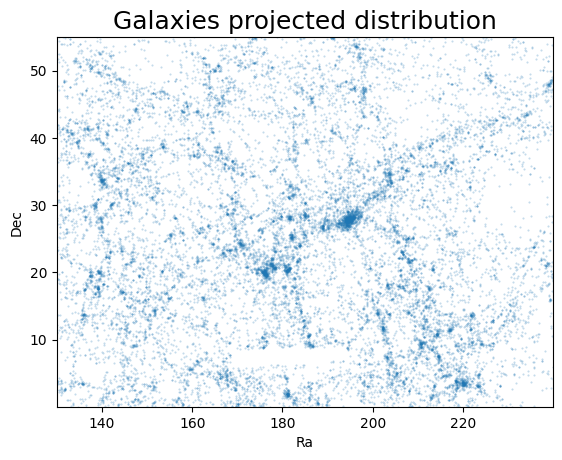

In [ ]:
plt.scatter(Ra, Dec, marker='o', s=0.2, alpha=0.3)
plt.xlabel('Ra')
plt.ylabel('Dec')
plt.title('Galaxies projected distribution', fontsize=18)
plt.xlim(min(Ra), max(Ra))
plt.ylim(min(Dec), max(Dec))
from google.colab import files
#plt.savefig('1_gal_proj_dist.png')
#files.download('1_gal_proj_dist.png')
plt.show()

## Definition of the observed volume of the sky to get the mean density and the overdensities

In [ ]:
z = env_col_table["redshift"]
z_max = np.max(z)
z_min = np.min(z)
print(z_max, z_min)

0.0299997 0.0150032


Whit a cosmological calculator (https://www.astro.ucla.edu/~wright/CosmoCalc.html) we find that the comoving volumes per those two z are:
V(z_max) = 0.009 Gpc^3
V(z_min) = 0.001 Gpc^3
so, the comoving volume of our interest (from z_min to z_max) is V_max - V_min = 0.008 Gpc^3

In [ ]:
#Dec and Ra in degree
dec_min = np.min(Dec)
dec_max = np.max(Dec)
print(dec_min, dec_max)
Ra_min = np.min(Ra)
Ra_max = np.max(Ra)
print(Ra_min, Ra_max)

0.0001625 54.9989014
130.0015564 239.9587097


In [ ]:
#un angolo solido di un intera sfera è pari a 4π steradianti (circa 41253 gradi quadrati)
solid_angle = 41253
our_angle = int((dec_max-dec_min)*(Ra_max-Ra_min))
print(our_angle)

6047


In [ ]:
V = 0.008*our_angle/solid_angle #in Gpc^3
print(V)

N_gal = len(z)

mean_den = N_gal/(V*1000**3) #in Mpc^-3
print(mean_den)

over_dens = dens_05/mean_den
#print(over_dens)

0.0011726662303347636
0.016495742351579294


In [ ]:
#COLOR BAND
#u-band = near-UV; g-band = green light; i-band = NIR
color_arr = env_col_table["gp"] - env_col_table["ip"]
#print(color_arr)

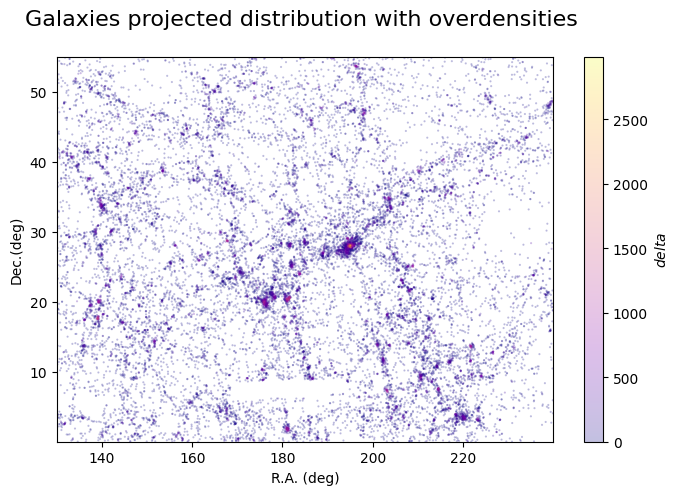

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(Ra, Dec, c=over_dens, marker='o', alpha=0.25, s=0.3, cmap = "plasma")
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec.(deg)')
plt.colorbar(label =r"$delta$")
plt.title('Galaxies projected distribution with overdensities \n', fontsize = 16)
plt.xlim(Ra_min, Ra_max)
plt.ylim(dec_min, dec_max)
plt.show()

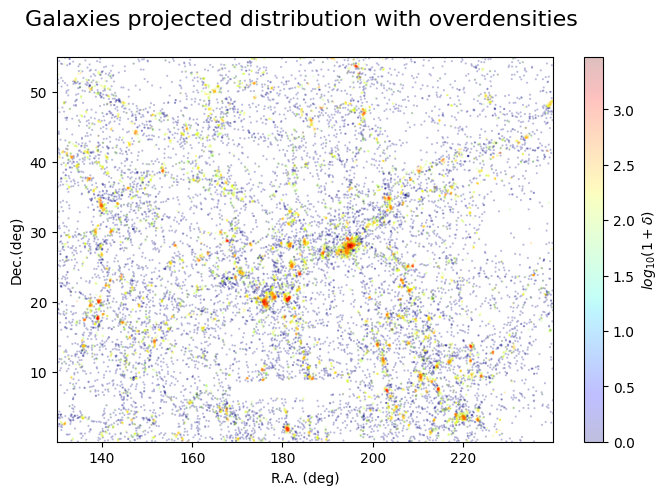

In [ ]:

plt.figure(figsize=(8, 5))
#import matplotlib.cm as cm
#cmap = cm.get_cmap('gist_rainbow')
#cmap_reversed = cmap.reversed()
plt.scatter(Ra, Dec, c=np.log10(1+over_dens), marker='o', alpha=0.25, s=0.3, cmap = 'jet')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec.(deg)')
plt.colorbar(label =r"$log_{10}(1+\delta)$")
plt.title('Galaxies projected distribution with overdensities \n', fontsize = 16)
plt.xlim(Ra_min, Ra_max)
plt.ylim(dec_min, dec_max)

#plt.savefig('2_Gal_overd.png')
#files.download('2_Gal_overd.png')
plt.show()

## Passive and Active galaxies for different densities bin

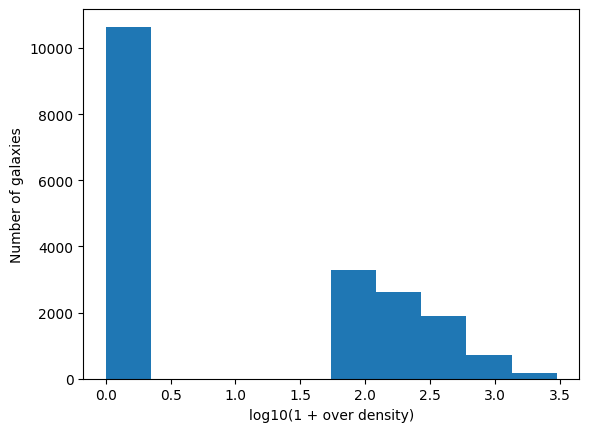

In [ ]:
plt.figure()
plt.hist(np.log10(1+over_dens),bins=10)
plt.xlabel('log10(1 + over density)')
plt.ylabel('Number of galaxies')
plt.show()

In [ ]:
#overdensities that are 0
overden_0 = []
for i in range(len(over_dens)):
  if over_dens[i] == 0:
    overden_0.append(np.log10(1+over_dens[i]))

print(len(overden_0))

10643


In [ ]:
log10_overdens = np.log10(1+over_dens)

In [ ]:
#actual overdensities (non 0)
log10_overdens_rest = []

for i in range(len(log10_overdens)):
  if log10_overdens[i] != 0:
    log10_overdens_rest.append(log10_overdens[i])

print(len(log10_overdens_rest))

8701


[1.8931287  2.42042595 2.9477232  3.47502045]


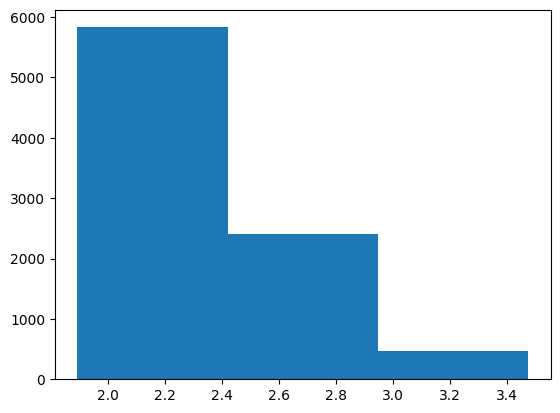

In [ ]:
x1, bins, x2 = plt.hist(log10_overdens_rest, bins=3)
print(bins)

In [ ]:
overden_1 = log10_overdens[(1.9 <= log10_overdens)&(log10_overdens < 2.4)]
overden_2 = log10_overdens[(2.4 <= log10_overdens)&(log10_overdens < 2.9)]
overden_3 = log10_overdens[(2.9 <= log10_overdens)&(log10_overdens < 3.4)]

#print(overden_1, overden_2, overden_3)
print(len(overden_1), len(overden_2), len(overden_3))

5505 2458 544


In [ ]:
mass = env_col_table["mass"]
mass_0 = mass[log10_overdens==0]
mass_1 = mass[(1.9 <= log10_overdens)&(log10_overdens < 2.4)]
mass_2 = mass[(2.4 <= log10_overdens)&(log10_overdens < 2.9)]
mass_3 = mass[(2.9 <= log10_overdens)&(log10_overdens < 3.4)]
color_0 = color_arr[log10_overdens==0]
color_1 = color_arr[(1.9 <= log10_overdens)&(log10_overdens < 2.4)]
color_2 = color_arr[(2.4 <= log10_overdens)&(log10_overdens < 2.9)]
color_3 = color_arr[(2.9 <= log10_overdens)&(log10_overdens < 3.4)]

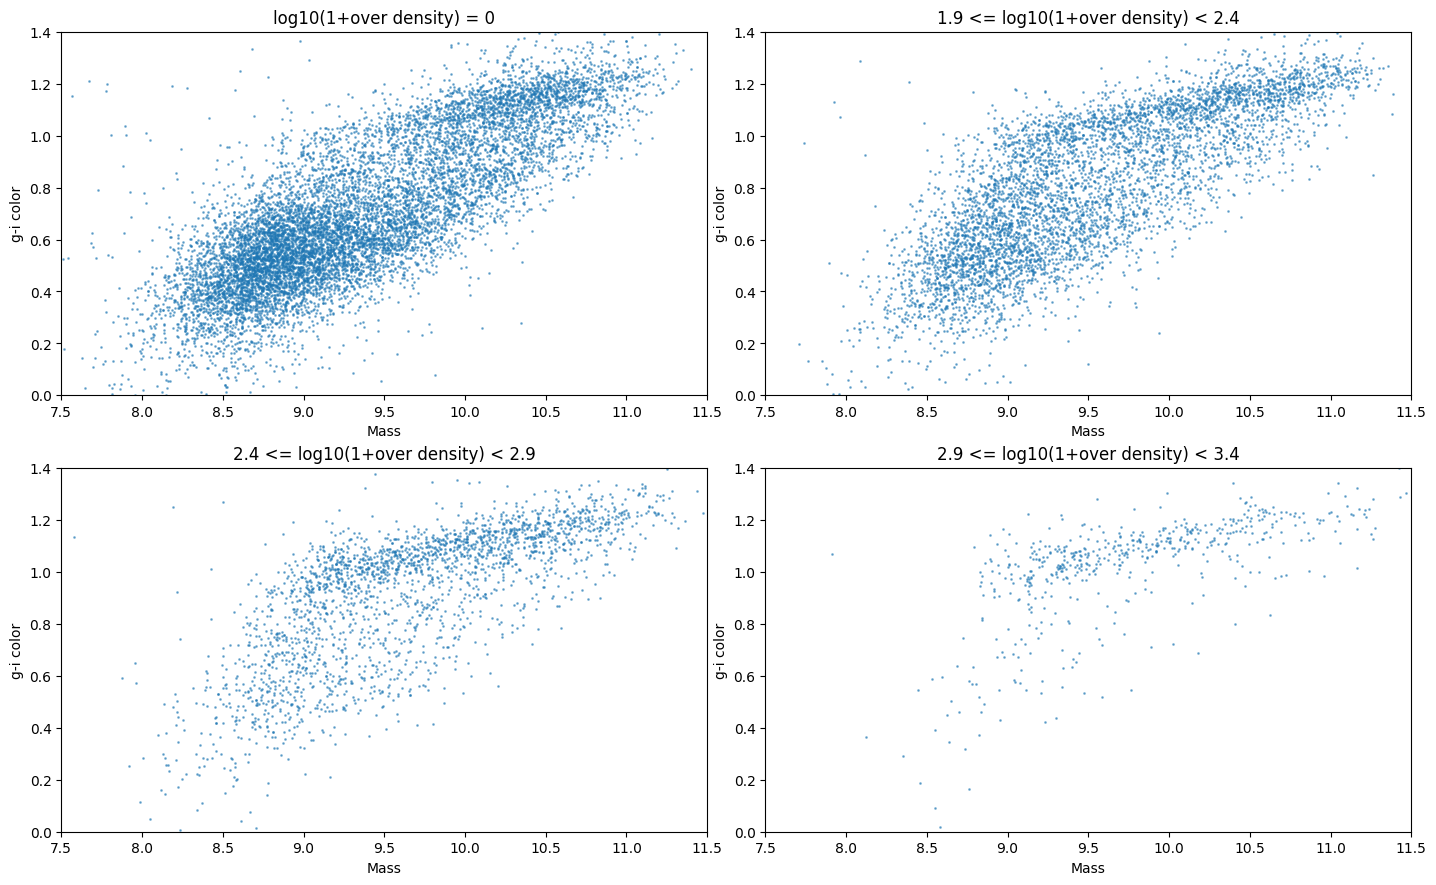

In [ ]:
mass_bins = [mass_0, mass_1, mass_2, mass_3]
color_bins = [color_0, color_1, color_2, color_3]
titles = ['log10(1+over density) = 0', '1.9 <= log10(1+over density) < 2.4',
          '2.4 <= log10(1+over density) < 2.9', '2.9 <= log10(1+over density) < 3.4']

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(wspace=0.09, bottom=0.15, top=0.95, left=0.07, right=0.97)

for i in range(4):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(mass_bins[i], color_bins[i], s=1, alpha=0.5)
    ax[row, col].set_xlabel('Mass')
    ax[row, col].set_ylabel('g-i color')
    ax[row, col].set_title(titles[i])
    ax[row, col].set_xlim(7.5, 11.5)
    ax[row, col].set_ylim(0, 1.4)

plt.show()

- Green valley: zona di transito veloce delle galassie sf e non sf
- si vede il delay e quello veloce dello starving
- si vede che l'enviroment non influenza la massa ma lo sf

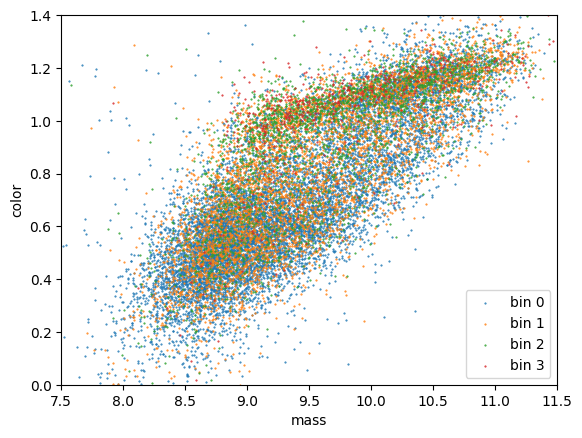

In [ ]:
plt.scatter(mass_0, color_0, marker='.', s=1, label='bin 0')
plt.scatter(mass_1, color_1, marker='.', s=1, label='bin 1')
plt.scatter(mass_2, color_2, marker='.', s=1, label='bin 2')
plt.scatter(mass_3, color_3, marker='.', s=1, label='bin 3')
plt.xlabel('mass')
plt.ylabel('color')
plt.xlim(7.5,11.5)
plt.ylim(0, 1.4)
plt.legend()
plt.show()

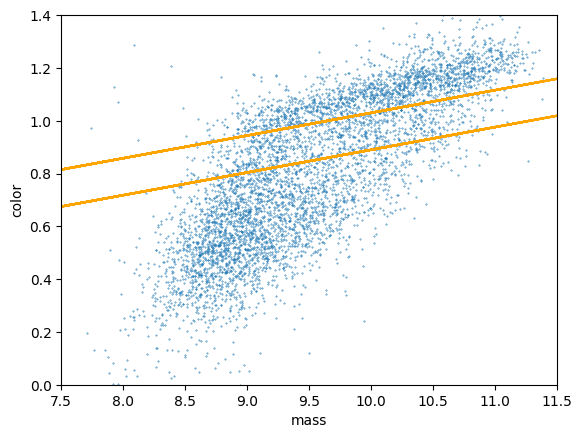

In [ ]:
plt.scatter(mass_1, color_1, marker='.', s=0.5, label='bin 1')
plt.xlabel('mass')
plt.ylabel('color')
plt.xlim(7.5,11.5)
plt.ylim(0, 1.4)
plt.plot(mass_1, 0.086*(np.array(mass_1))+0.17,'orange')
plt.plot(mass_1, 0.086*(np.array(mass_1))+0.03,'orange')
plt.show()

In [ ]:
mass_red = mass[color_arr > 0.086*(np.array(mass))+0.17]
color_red = color_arr[color_arr > 0.086*(np.array(mass))+0.17]
mass_green = mass[(0.086*(np.array(mass))+0.17 >= color_arr)&(color_arr >= (0.086*(np.array(mass)) + 0.03))]
color_green = color_arr[(0.086*(np.array(mass))+0.17 >= color_arr)&(color_arr >= (0.086*(np.array(mass)) + 0.03))]
mass_blue = mass[color_arr < (0.086*(np.array(mass)) + 0.03)]
color_blue = color_arr[color_arr < (0.086*(np.array(mass)) + 0.03)]

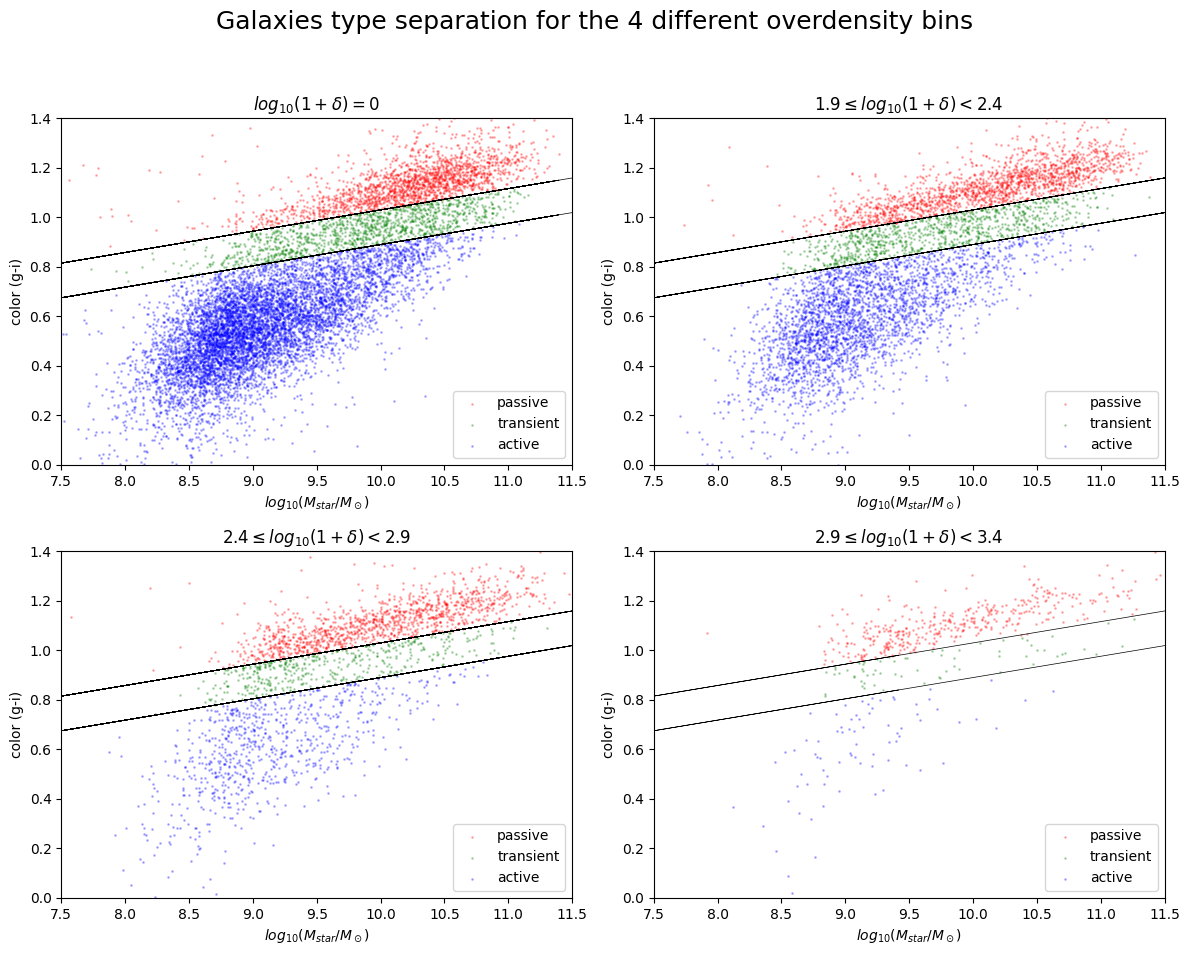

In [ ]:
n_r=[]
n_g=[]
n_b=[]

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(wspace=0.15, bottom=0.1, top=1, left=0.07, right=0.97)

mass_bins = [mass_0, mass_1, mass_2, mass_3]
color_bins = [color_0, color_1, color_2, color_3]
titles = [r'$log_{10}(1+\delta) = 0$', r'$1.9 \leq log_{10}(1+\delta) < 2.4$',
          r'$2.4 \leq log_{10}(1+\delta) < 2.9$', r'$2.9 \leq log_{10}(1+\delta) < 3.4$']


for i in range(4):
    row = i // 2 #This calculates the row index for placing a subplot in a 2x2 grid. The // operator performs integer division,
                 #so for i values 0 and 1, row will be 0, and for i values 2 and 3, row will be 1. This effectively assigns
                 #the first two iterations to the first row and the last two iterations to the second row.
    col = i % 2  #This calculates the column index for placing a subplot in the same 2x2 grid. The % operator calculates
                 #the remainder of the division. For i values 0 and 2, col will be 0, and for i values 1 and 3, col will be 1.
                 #This effectively assigns the even iterations to the first column and the odd iterations to the second column.

    current_mass_bin = mass_bins[i]
    current_color_bin = color_bins[i]

    red_mask = current_color_bin > 0.086 * (np.array(current_mass_bin)) + 0.17
    green_mask = (0.086 * (np.array(current_mass_bin)) + 0.17 >= current_color_bin) & (current_color_bin >= (0.086 * (np.array(current_mass_bin)) + 0.03))
    blue_mask = current_color_bin < (0.086 * (np.array(current_mass_bin)) + 0.03)

    n_r.append(np.sum(red_mask))   #4 vector with the passive galaxies sum for each denity bin
    n_g.append(np.sum(green_mask)) #4 vector with the transient galaxies sum for each denity bin
    n_b.append(np.sum(blue_mask))  #4 vector with the active galaxies sum for each denity bin

    ax[row, col].scatter(current_mass_bin[red_mask], current_color_bin[red_mask], s=1, alpha=0.25, color='red', label='passive')
    ax[row, col].scatter(current_mass_bin[green_mask], current_color_bin[green_mask], s=1, alpha=0.25, color='green', label='transient')
    ax[row, col].scatter(current_mass_bin[blue_mask], current_color_bin[blue_mask], s=1, alpha=0.25, color='blue', label='active')
    # Use np.append to add points for plotting the lines
    mass_for_line = np.append(current_mass_bin, [6, 12])
    ax[row, col].plot(mass_for_line, 0.086 * mass_for_line + 0.17, 'black', linewidth=0.5)
    ax[row, col].plot(mass_for_line, 0.086 * mass_for_line + 0.03, 'black', linewidth=0.5)

    ax[row, col].set_xlabel('$log_{10}(M_{star}/M_\odot)$')
    ax[row, col].set_ylabel('color (g-i)')
    ax[row, col].set_title(titles[i])
    ax[row, col].set_xlim(7.5, 11.5)
    ax[row, col].set_ylim(0, 1.4)
    ax[row, col].legend(loc='lower right')

fig.suptitle('Galaxies type separation for the 4 different overdensity bins', fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap


#plt.savefig('3_Gal_colors.png')
#files.download('3_Gal_colors.png')

plt.show()

## Passive and active galaxies with star formation rate

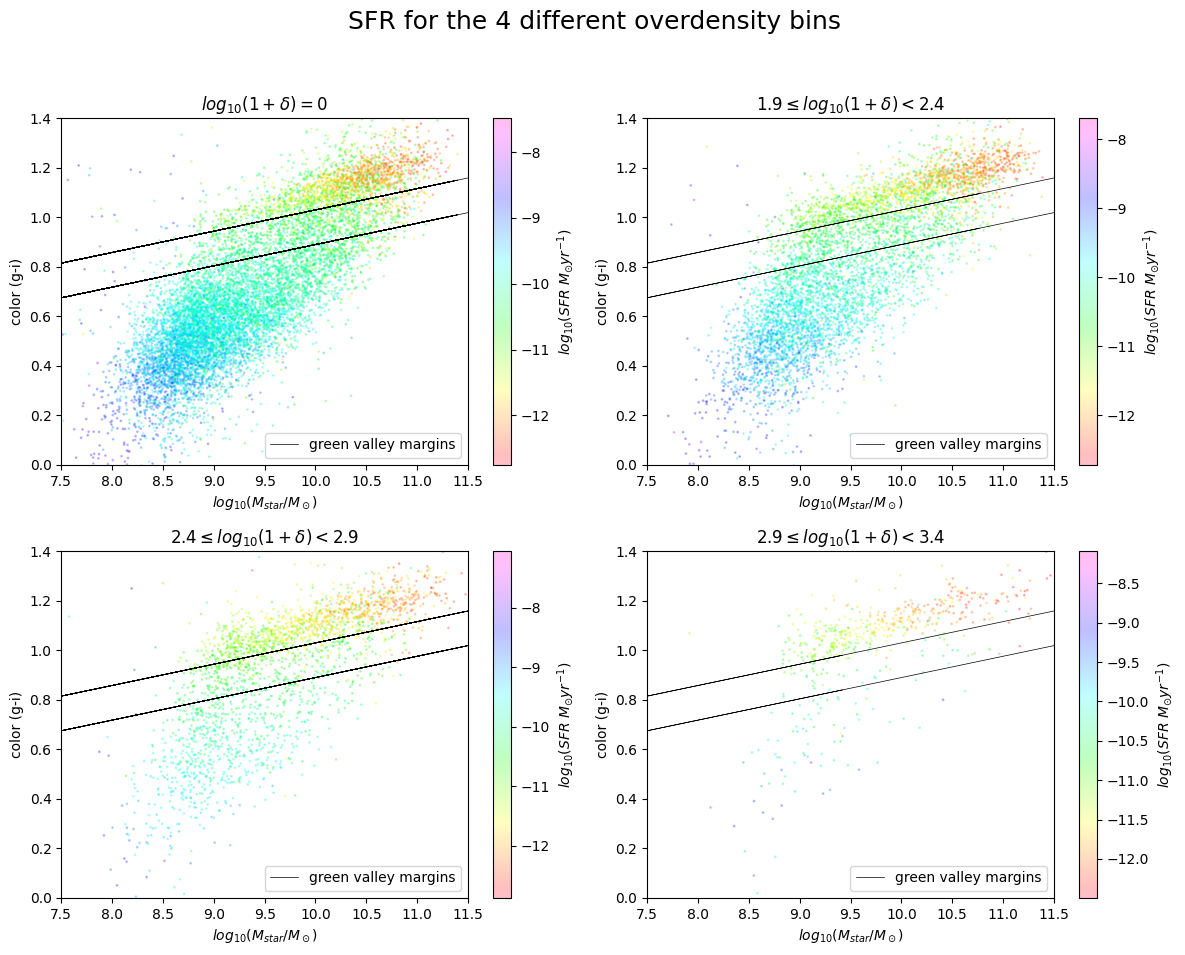

In [ ]:
log_sfr = env_col_table["ssfr"]

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(wspace=0.15, bottom=0.1, top=1, left=0.07, right=0.97)

mass_bins = [mass_0, mass_1, mass_2, mass_3]
color_bins = [color_0, color_1, color_2, color_3]
titles = [r'$log_{10}(1+\delta)=0$', r'$1.9 \leq log_{10}(1+\delta) < 2.4$',
          r'$2.4 \leq log_{10}(1+\delta) < 2.9$', r'$2.9 \leq log_{10}(1+\delta) < 3.4$']

# Create sfr bins corresponding to the mass and color bins
sfr_bins = [log_sfr[log10_overdens==0],
            log_sfr[(1.9 <= log10_overdens)&(log10_overdens < 2.4)],
            log_sfr[(2.4 <= log10_overdens)&(log10_overdens < 2.9)],
            log_sfr[(2.9 <= log10_overdens)&(log10_overdens < 3.4)]]

# Define a small epsilon to avoid log(0)
epsilon = 1e-9

for i in range(4):
    row = i // 2
    col = i % 2

    current_mass_bin = mass_bins[i]
    current_color_bin = color_bins[i]
    current_sfr_bin = sfr_bins[i] # Get the corresponding sfr bin

    # Use log_sfr for coloring the scatter plot and store the mappable object
    scatter_plot = ax[row, col].scatter(current_mass_bin, current_color_bin, c=current_sfr_bin, s=1, alpha=0.25, cmap='gist_rainbow')
    # Use np.append to add points for plotting the lines
    mass_for_line = np.append(current_mass_bin, [6, 12])
    ax[row, col].plot(mass_for_line, 0.086 * mass_for_line + 0.17, 'black', linewidth=0.5, label='green valley margins')
    ax[row, col].plot(mass_for_line, 0.086 * mass_for_line + 0.03, 'black', linewidth=0.5)

    ax[row, col].set_xlabel('$log_{10}(M_{star}/M_\odot)$')
    ax[row, col].set_ylabel('color (g-i)')
    ax[row, col].set_title(titles[i])
    ax[row, col].set_xlim(7.5, 11.5)
    ax[row, col].set_ylim(0, 1.4)
    ax[row, col].legend(loc='lower right')

    # Add a colorbar for the current subplot
    fig.colorbar(scatter_plot, ax=ax[row, col], label=r'$log_{10}(SFR\ M_{\odot}yr^{-1})$')

fig.suptitle('SFR for the 4 different overdensity bins', fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap

from google.colab import files
#plt.savefig('4_Gal_sfr.png')
#files.download('4_Gal_sfr.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

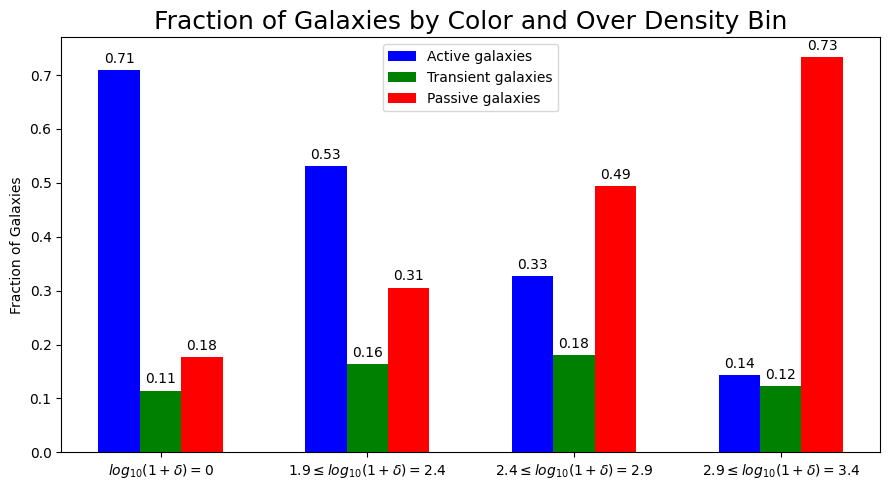

In [ ]:
total = [n_r[i] + n_g[i] + n_b[i] for i in range(4)]
frac_r = [n_r[i] / total[i] for i in range(4)]
frac_g = [n_g[i] / total[i] for i in range(4)]
frac_b = [n_b[i] / total[i] for i in range(4)]

x = np.arange(4)  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(9,5))
rects1 = ax.bar(x - width, frac_b, width, label='Active galaxies', color='blue')
rects2 = ax.bar(x, frac_g, width, label='Transient galaxies', color='green')
rects3 = ax.bar(x + width, frac_r, width, label='Passive galaxies', color='red')

# Add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.set_ylabel('Fraction of Galaxies')
ax.set_title('Fraction of Galaxies by Color and Over Density Bin', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(['$log_{10}(1+δ)=0$', '$1.9 \leq log_{10}(1+δ)=2.4$', '$2.4 \leq log_{10}(1+δ)=2.9$', '$2.9\leq log_{10}(1+δ)=3.4$'])
ax.legend()

fig.tight_layout()

from google.colab import files
plt.savefig('5_Gal_bins.png')
files.download('5_Gal_bins.png')

plt.show()

- passive galaxies increase with overdensities while active galaxies decrease --> environment consequence
- green galaxies almost constant and way less --> fast process beteen active ang passive

# Spectroscopy

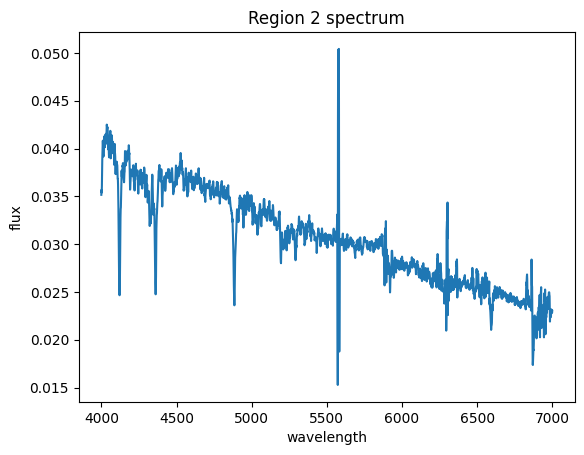

In [ ]:
spec = []
regionid = [1,2,3,11,12,13]
for i in regionid:
  spec.append(fits.open("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 5/Env_Qtime/Spec_N4330_region{}.fits".format(i)))

#flux, error and wavelenght for specra of region 2
specflx = spec[1][0].data
specerr = spec[1][1].data
specwav = spec[1][2].data

plt.figure()
plt.plot(specwav,specflx)
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.title('Region 2 spectrum')
plt.show()

110
2313.881271866931
2


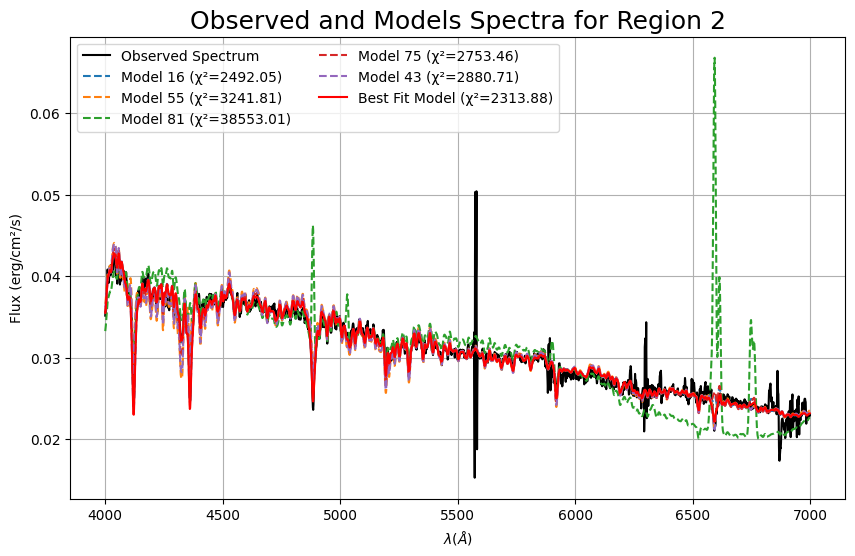

In [ ]:
#Read model
modhdu = fits.open("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 5/Env_Qtime/Models_N4330_region{}.fits".format(2))
#print(modhdu.info())

#How many extensions
Next = modhdu[0].header["NEXT"]
modwave = modhdu[0].data
chi_quad = []
rap_arr = []
#print(Next)

for ext in np.arange(1,Next+1):
  thisext = modhdu[ext]
  thishead = thisext.header
  modspec = thisext.data

  Qtau = thishead["TRUNCTAU"]
  Qage = thishead["TRUNCAGE"]

  photarr = np.array((thishead["MODFUV"],thishead["MODNUV"],\
  thishead["MODU"],thishead["MODG"],\
  thishead["MODI"],thishead["MODZ"],\
  thishead["MODIR1"],thishead["MODIR4"]))

  #riscalage
  ratio_arr = []
  # Ensure we don't go out of bounds for specflx
  for i in range(min(len(modspec[0]), len(specflx))):
    # Add a small epsilon to avoid division by zero
    ratio = modspec[0][i]/(specflx[i] + 1e-9)
    ratio_arr.append(ratio)
  #The median is used to get a robust estimate of the scaling factor, less affected by outliers than the mean
  rap=np.median(ratio_arr) #scalin factor for each model given the flux
  rap_arr.append(rap)

  #chiquadrage (squared difference between observed and model flux)
  # Ensure arrays have the same length for calculation
  min_len = min(len(specflx), len(modspec[0]), len(specerr))
  Q = ((specflx[:min_len] - modspec[0][:min_len]/rap)**2)/(specerr[:min_len]**2 + 1e-9) # Add epsilon to avoid division by zero
  chi2 = np.sum(Q)
  chi_quad.append(chi2)

print(len(chi_quad))
#print(chi_quad) # Keep this commented out for brevity unless needed
print(np.min(chi_quad))
print(np.argmin(chi_quad))

chi2_min = np.min(chi_quad)
index_mod = np.argmin(chi_quad)

plt.figure(figsize=(10, 6))
plt.plot(specwav, specflx, label="Observed Spectrum", color='black')

# Plot 5 random models for comparison
num_models_to_plot = 5
# Ensure we don't try to select more models than available
if Next > 0:
    random_indices = np.random.choice(Next, size=min(num_models_to_plot, Next), replace=False)
    for i in random_indices:
        # FITS extensions are 1-based, and rap_arr is 0-based corresponding to the loop over extensions
        model_spec_to_plot = modhdu[i + 1].data[0] / rap_arr[i]
        plt.plot(modwave[0], model_spec_to_plot, linestyle='--', label=f'Model {i+1} (χ²={chi_quad[i]:.2f})')
else:
    print("Warning: No models available to plot.")


# Plot the best-fitting model
best_fit_spec = modhdu[index_mod + 1].data[0] / rap_arr[index_mod]
plt.plot(modwave[0], best_fit_spec, color='red', label=f'Best Fit Model (χ²={chi2_min:.2f})')


plt.xlabel('$\lambda (\AA)$')
plt.ylabel('Flux (erg/cm²/s)')
plt.title('Observed and Models Spectra for Region 2', fontsize=18)
plt.legend(loc='upper left', ncol=2)
plt.grid(True)

#from google.colab import files
#plt.savefig('6_reg2_spectra&models.png')
#files.download('6_reg2_spectra&models.png')

plt.show()

In [ ]:
photo = fits.open("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 5/Env_Qtime/Phot_N4330.fits")
photo_tab = Table.read("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 5/Env_Qtime/Phot_N4330.fits")
print(photo_tab)
print(photo_tab[0])

 id    z_best    dl  f_FUV  e_FUV  ... f_IRAC4 e_IRAC4 f_PACS100 e_PACS100
--- ----------- ---- ------ ------ ... ------- ------- --------- ---------
  1   0.0046705 16.5   0.07 0.0025 ...   0.341   0.197       0.1     23.55
  2   0.0046705 16.5  0.107  0.005 ...   0.598    0.08       0.1     12.19
  3 0.004670558 16.5 0.1229  0.006 ...   3.079   0.085      59.4     12.41
 11   0.0046705 16.5  0.145   0.07 ...   3.326   0.084      58.3     12.34
 12   0.0046705 16.5   0.02 0.0018 ...   0.298    0.08       0.0     12.61
 13   0.0046705 16.5  0.007  0.002 ...   0.082   0.189       0.0      24.1
 id   z_best   dl  f_FUV e_FUV  f_NUV e_NUV  f_U   e_U   f_G   e_G   f_I   e_I   f_Z   e_Z  f_IRAC1 e_IRAC1 f_IRAC4 e_IRAC4 f_PACS100 e_PACS100
--- --------- ---- ----- ------ ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ------- ------- ------- ------- --------- ---------
  1 0.0046705 16.5  0.07 0.0025 0.111 0.005 0.513 0.035 1.203 0.054 2.191 0.117 2.528 0.181   1.329    0.11   0.

## Per tutti i modelli per ogni spettro (1,2,3,11,12,13)

In summary, this cell performs a detailed analysis for each specified region by fitting a set of model spectra and photometry to the observed data, identifying the best-fitting model based on spectroscopic chi-squared, and visualizing the distribution of model parameters in relation to the fit quality.

In [ ]:
#how photometric data are taken
print(len(photo), '\n')
for i in range(len(photo)):
  photo_data = photo[i].data
  print(photo_data, '\n')

#so, actual data are in photo[1].data

print(np.array((photo[1].data)[0][3:18:2]), '\n') #this are the fluxes values for region 1
print(np.array((photo[1].data)[0][4:19:2]), '\n') #this are the fluxes error values for region 1

2 

[ 60  63 120 ...  69  62  10] 

[( 1, 0.0046705 , 16.5, 0.07  , 0.0025, 0.111, 0.005, 0.513, 0.035, 1.203, 0.054, 2.191  , 0.117  , 2.528  , 0.181 , 1.329, 0.11 , 0.341, 0.197,  0.1, 23.55)
 ( 2, 0.0046705 , 16.5, 0.107 , 0.005 , 0.171, 0.008, 0.686, 0.045, 1.539, 0.05 , 2.591  , 0.09   , 3.027  , 0.11  , 1.477, 0.049, 0.598, 0.08 ,  0.1, 12.19)
 ( 3, 0.00467056, 16.5, 0.1229, 0.006 , 0.188, 0.009, 0.845, 0.055, 1.96 , 0.065, 3.567  , 0.11   , 4.287  , 0.148 , 2.452, 0.052, 3.079, 0.085, 59.4, 12.41)
 (11, 0.0046705 , 16.5, 0.145 , 0.07  , 0.219, 0.01 , 0.848, 0.05 , 1.863, 0.06 , 3.27477, 0.11277, 3.73129, 0.131 , 2.068, 0.052, 3.326, 0.084, 58.3, 12.34)
 (12, 0.0046705 , 16.5, 0.02  , 0.0018, 0.057, 0.003, 0.374, 0.025, 0.929, 0.03 , 1.7131 , 0.06   , 1.936  , 0.0814, 0.942, 0.05 , 0.298, 0.08 ,  0. , 12.61)
 (13, 0.0046705 , 16.5, 0.007 , 0.002 , 0.032, 0.004, 0.323, 0.028, 0.855, 0.05 , 1.699  , 0.116  , 2.022  , 0.161 , 0.863, 0.122, 0.082, 0.189,  0. , 24.1 )] 

[0.07  0.111 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

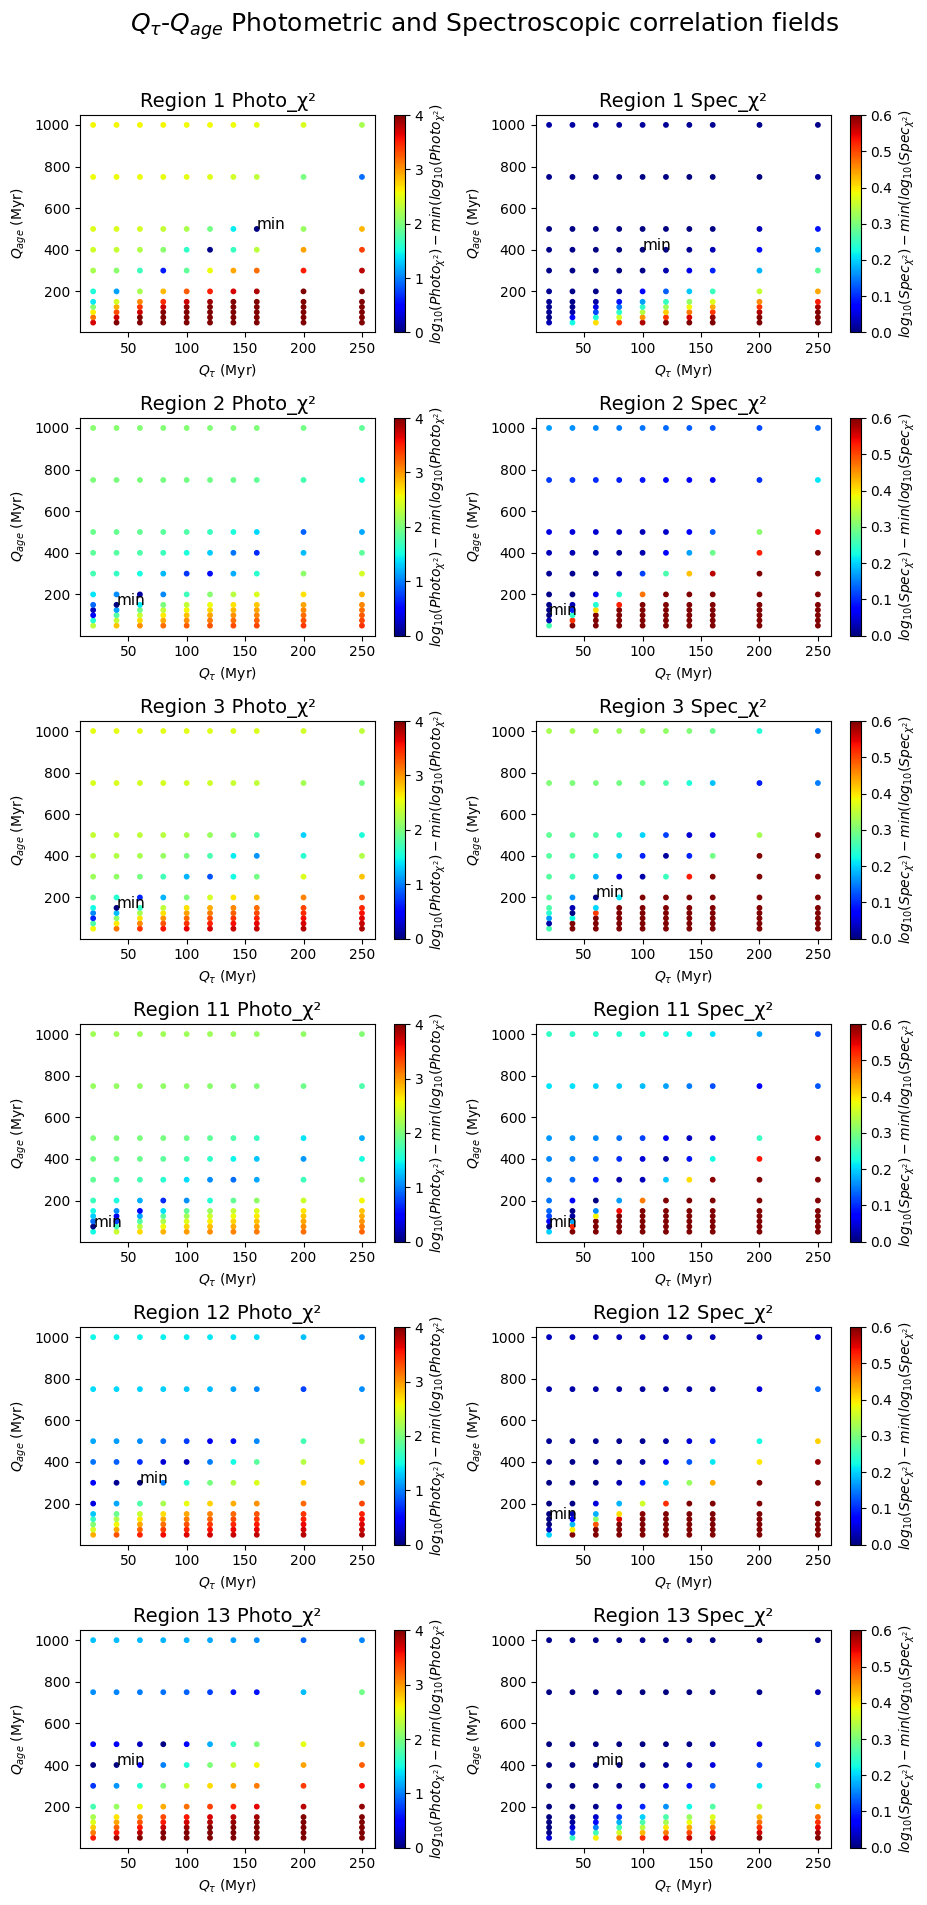

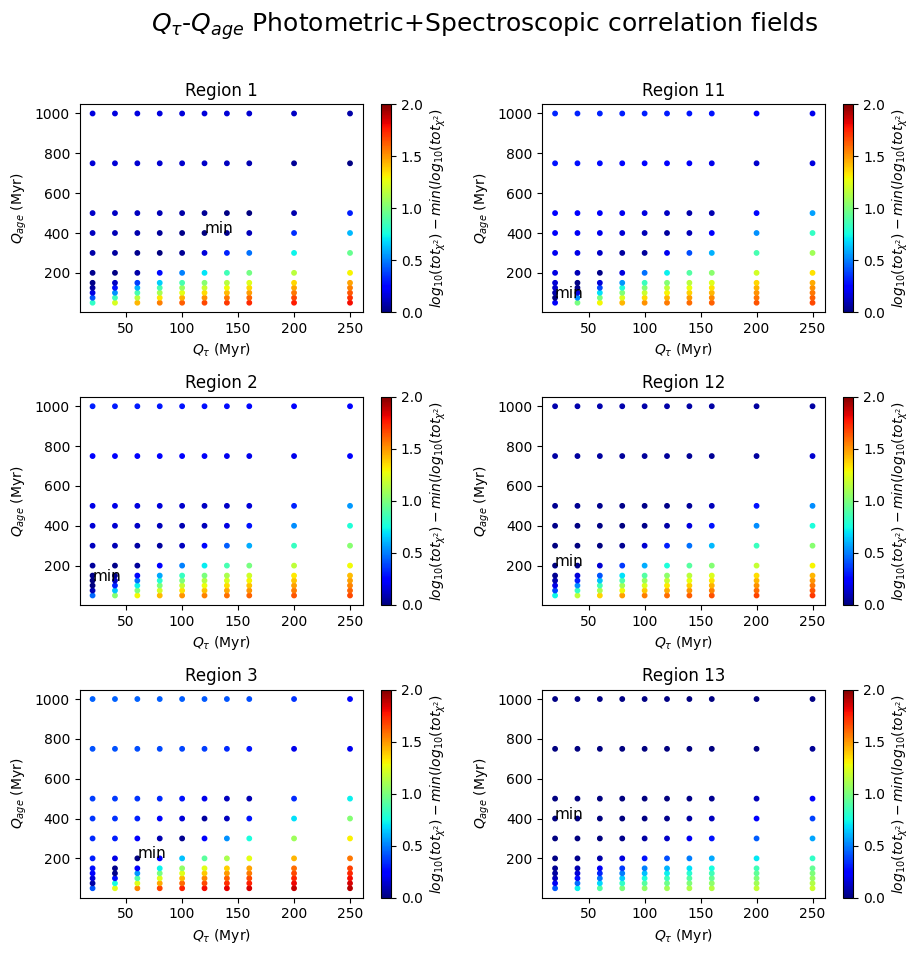

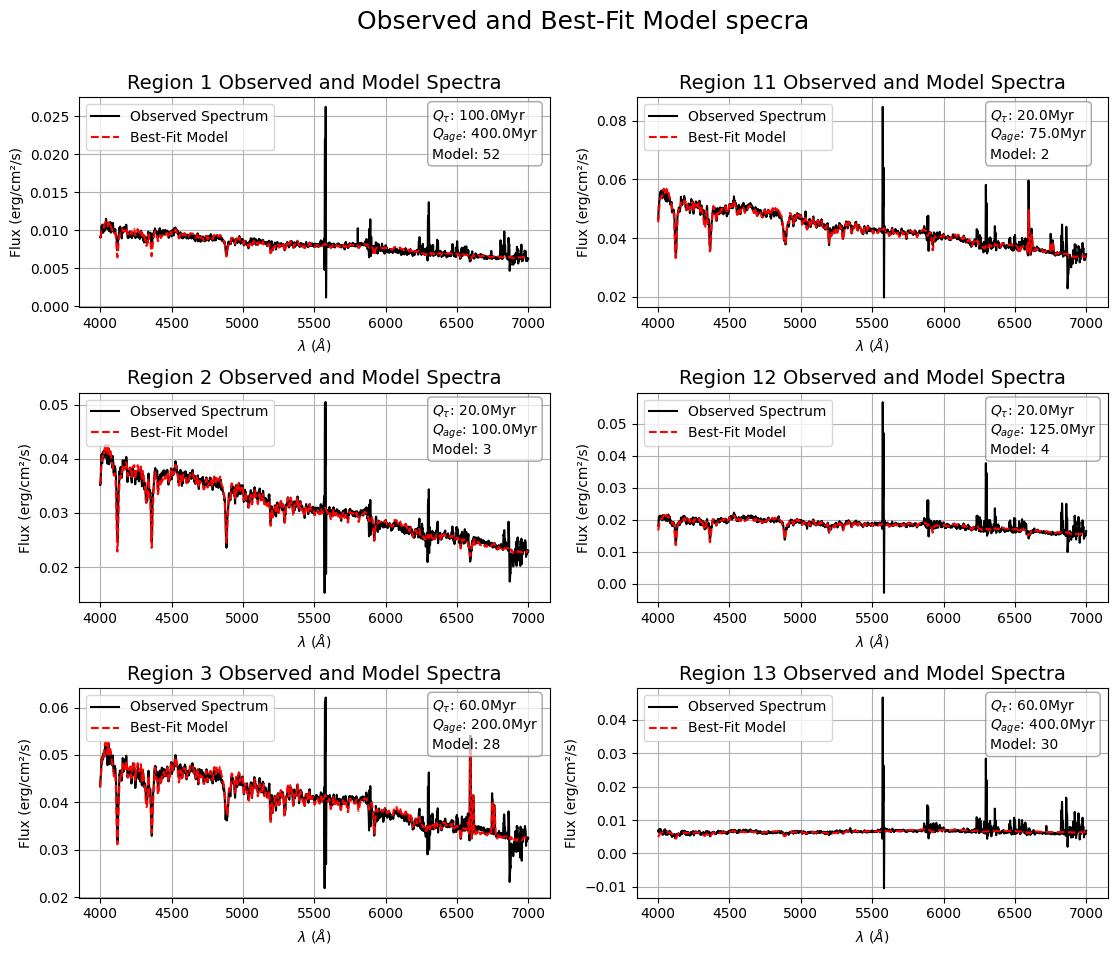

In [ ]:
#Read model
modhdu_i = []
spec_i = []

photo_data = photo[1].data
#print(photo_data)

for i in regionid:
  spec_i.append(fits.open("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 5/Env_Qtime/Spec_N4330_region{}.fits".format(i)))
  modhdu_i.append(fits.open("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 5/Env_Qtime/Models_N4330_region{}.fits".format(i)))

chi2_i = []
chi_quad_i = []
chi2_photo = []
chi_quad_photo = []

index_mintot_v = []

# Define a small epsilon to avoid log(0)
epsilon = 1e-9

# Create a single figure with a 6x3 grid of subplots
fig, axes = plt.subplots(6, 2, figsize=(10, 20)) # Adjust figsize as needed
fig.suptitle(r'$Q_{\tau}$-$Q_{age}$ Photometric and Spectroscopic correlation fields', fontsize=18)

#2x6 figure for spec_chi^2 and phot_chi^2 together
fig2, axes2 = plt.subplots(3, 2, figsize=(10, 10))
fig2.suptitle(r'$Q_{\tau}$-$Q_{age}$ Photometric+Spectroscopic correlation fields', fontsize=18)

#spegra images
fig3, axes3 = plt.subplots(3, 2, figsize=(12, 10))
fig3.suptitle('Observed and Best-Fit Model specra', fontsize=18)

for idx, j in enumerate(regionid): # Use enumerate to get both index and value
  # Access the header of the primary HDU (index 0)
  #model data
  Next_i = modhdu_i[idx][0].header["NEXT"] #number of models
  modwave_i = modhdu_i[idx][0].data
  #observed data
  specflx_i = spec_i[idx][0].data
  specerr_i = spec_i[idx][1].data
  specwav_i = spec_i[idx][2].data

  chi_quad_i = []
  rap_i_arr = []
  chi_quad_photo = []

  Qtau_arr = np.zeros(Next_i)
  Qage_arr = np.zeros(Next_i)

  for ext in np.arange(1,Next_i+1): # Use Next_i instead of Next
    # Add a check to ensure the extension index is valid
    if ext < len(modhdu_i[idx]):
        thisext_i = modhdu_i[idx][ext]
        thishead_i = thisext_i.header
        modspec_i = thisext_i.data

        Qtau_arr[ext-1] = thishead_i["TRUNCTAU"]
        Qage_arr[ext-1] = thishead_i["TRUNCAGE"]

        photarr_i = np.array((thishead_i["MODFUV"],thishead_i["MODNUV"],\
        thishead_i["MODU"],thishead_i["MODG"],\
        thishead_i["MODI"],thishead_i["MODZ"],\
        thishead_i["MODIR1"],thishead_i["MODIR4"]))

        #riscalage
        ratio_arr_i = []
        for i in range(0,200):
            # Add a small epsilon to avoid division by zero
            ratio_i = modspec_i[0][i]/(specflx_i[i] + 1e-9)
            ratio_arr_i.append(ratio_i)
        rap_i=np.median(ratio_arr_i)
        rap_i_arr.append(rap_i)


        #chiquadrage
        Q_i = ((specflx_i - modspec_i[0]/rap_i)**2)/(specerr_i**2 + epsilon) # Add epsilon to avoid division by zero
        chi2_i = np.sum(Q_i)
        chi_quad_i.append(chi2_i)

        Q_photo = ((np.array(photo_data[regionid.index(j)][3:18:2])-photarr_i)**2)/(np.array(photo_data[regionid.index(j)][4:19:2])**2 )
        chi2_photo = np.sum(Q_photo)
        chi_quad_photo.append(chi2_photo)
    else:
        print(f"Warning: Skipping model {ext} for region {j} due to invalid extension index.")


  # Check if chi_quad_i is empty before calculating min and argmin
  if chi_quad_i:
      chi2_min_i = np.min(chi_quad_i)
      index_mod_i = np.argmin(chi_quad_i)

      thisext_min = modhdu_i[idx][index_mod_i+1] # Add +1 because extensions are 1-based
      thishead_min = thisext_min.header
      modspec_min = thisext_min.data

      # Plot 1: Observed and Best Fit Spectrum in the first column of the current row
      col3 = idx // 3
      row3 = idx % 3
      axes3[row3, col3].plot(specwav_i,specflx_i, label="Observed Spectrum", color='black')
      axes3[row3, col3].plot(modwave_i[0],modspec_min[0]/rap_i_arr[index_mod_i], '--', color='red', label='Best-Fit Model')
      axes3[row3, col3].set_xlabel('$\lambda$ $(\AA)$')
      axes3[row3, col3].set_ylabel('Flux (erg/cm²/s)')
      axes3[row3, col3].set_title(f'Region {j} Observed and Model Spectra', fontsize=14)
      axes3[row3, col3].legend(loc='upper left')
      axes3[row3, col3].grid(True)
      # Add text annotation for Q_age, Q_tau, and best-fit model index
      qtau_val_i = Qtau_arr[index_mod_i]
      qage_val_i = Qage_arr[index_mod_i]
      model_index_i = index_mod_i + 1 # Model index is 1-based

      text_str_i = f'$Q_\\tau$: {qtau_val_i}Myr\n$Q_{{age}}$: {qage_val_i}Myr\nModel: {model_index_i}'
      axes3[row3, col3].text(0.75, 0.95, text_str_i, transform=axes3[row3, col3].transAxes,
                        fontsize=10, verticalalignment='top', horizontalalignment='left',
                        bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', alpha=0.7))




      # Plot 2: photometric Chi-squared Relative Scatter in the third column
      log_chi_quad_photo = np.log10(np.array(chi_quad_photo) + epsilon)
      # Check if there are finite values in log_chi_quad_i before calculating min
      if np.sum(np.isfinite(log_chi_quad_photo)) > 0:
          min_log_chi_quad_photo = np.min(log_chi_quad_photo[np.isfinite(log_chi_quad_photo)]) # Recalculate min_log_chi_quad_i here
          im4 = axes[idx, 0].scatter(Qtau_arr[:len(chi_quad_photo)], Qage_arr[:len(chi_quad_photo)],
                                     c=log_chi_quad_photo - min_log_chi_quad_photo, s = 10, clim=[0, 4], cmap='jet') # Simplified clim
          axes[idx, 0].set_xlabel(r'$Q_{\tau}$ (Myr)')
          axes[idx, 0].set_ylabel(r'$Q_{age}$ (Myr)')
          axes[idx, 0].set_title(f'Region {j} Photo_χ²', fontsize=14)
          fig.colorbar(im4, ax=axes[idx, 0], label='$log_{10}(Photo_{\chi^2}) - min(log_{10}(Photo_{\chi^2})$')
      else:
           axes[idx, 0].set_title(f'Region {j} Photometric χ² (No valid data)')

      index_minphoto = np.argmin(log_chi_quad_photo-min_log_chi_quad_photo)
      axes[idx, 0].text(Qtau_arr[index_minphoto], Qage_arr[index_minphoto], 'min', fontsize=11, color='black')

      # Plot 3: Spectroscopic Chi-squared Relative Scatter in the third column
      log_chi_quad_i = np.log10(np.array(chi_quad_i) + epsilon)
      # Check if there are finite values in log_chi_quad_i before calculating min
      if np.sum(np.isfinite(log_chi_quad_i)) > 0:
          min_log_chi_quad_i = np.min(log_chi_quad_i[np.isfinite(log_chi_quad_i)]) # Recalculate min_log_chi_quad_i here
          im4 = axes[idx, 1].scatter(Qtau_arr[:len(chi_quad_i)], Qage_arr[:len(chi_quad_i)],
                                     c=log_chi_quad_i - min_log_chi_quad_i, s = 10, clim=[0, 0.6], cmap='jet') # Simplified clim
          axes[idx, 1].set_xlabel(r'$Q_{\tau}$ (Myr)')
          axes[idx, 1].set_ylabel(r'$Q_{age}$ (Myr)')
          axes[idx, 1].set_title(f'Region {j} Spec_χ²', fontsize=14)
          fig.colorbar(im4, ax=axes[idx, 1], label='$log_{10}(Spec_{\chi^2}) - min(log_{10}(Spec_{\chi^2})$')
      else:
          axes[idx, 1].set_title(f'Region {j} Spectroscopic χ² relative to min (No valid data)')

      index_minspec = np.argmin(log_chi_quad_i-min_log_chi_quad_i)
      axes[idx, 1].text(Qtau_arr[index_minspec], Qage_arr[index_minspec], 'min', fontsize=11, color='black')


      #photometric-spectroscopic chi-squared
      log_chitot = np.log10(np.array(chi_quad_i) + np.array(chi_quad_photo))
      min_log_chitot = np.min(log_chitot[np.isfinite(log_chitot)]) # Recalculate min_log_chi_quad_i here
      col2 = idx // 3
      row2 = idx % 3
      imag = axes2[row2, col2].scatter(Qtau_arr[:len(log_chitot)], Qage_arr[:len(log_chitot)],
                                     c=log_chitot - min_log_chitot, s = 10, clim=[0, 2], cmap='jet') # Simplified clim
      axes2[row2, col2].set_xlabel(r'$Q_{\tau}$ (Myr)')
      axes2[row2, col2].set_ylabel(r'$Q_{age}$ (Myr)')
      axes2[row2, col2].set_title(f'Region {j}', fontsize=12)
      fig2.colorbar(imag, ax=axes2[row2, col2], label='$log_{10}(tot_{\chi^2}) - min(log_{10}(tot_{\chi^2})$')
      index_mintot = np.argmin(log_chitot-min_log_chitot)
      index_mintot_v.append(index_mintot)
      axes2[row2, col2].text(Qtau_arr[index_mintot], Qage_arr[index_mintot], 'min', fontsize=11, color='black')

  else:
      print(f"No valid spectroscopic chi-squared values calculated for region {j}. Skipping plotting for this row.")


# Turn off any unused subplots if the number of regions is less than 6 (which it is)
# Although the loop is for regionid which has 6 elements, so all rows will be used.
# However, if any region had no valid chi-squared data, its row would be empty except for titles if added outside the if chi_quad_i block.
# Since we are plotting inside the if chi_quad_i block, if chi_quad_i is empty, the row will be empty.
# No need to explicitly turn off axes for the 6 regions.

fig3.tight_layout(rect=[0.01, 0.03, 0.95, 0.97])
fig3.savefig('10_spec&mod.png')
files.download('10_spec&mod.png')

fig.tight_layout(rect=[0.01, 0.03, 0.95, 0.97]) # Adjust layout to prevent title overlap
#fig.savefig('7_spec&mod_chisq.png')
#files.download('7_spec&mod_chisq.png')

fig2.tight_layout(rect=[0.01, 0.03, 0.95, 0.97])
#fig2.subplots_adjust(wspace=0.8, hspace=0.9, bottom=0.1, top=0.90, left=0.15, right=0.97)
#fig2.savefig('8_spec+mod_chisq.png')
#files.download('8_spec+mod_chisq.png')
plt.show()

#FISICAMENTE: l'andamento osservato significa che le due grandezza essendo due tempi sono difficilmente separabili
#             e che nel passato l' e^-tau era più lento mentre in tempi più recenti più veloce

In [ ]:
print('min spec_chi^2:', min(log_chi_quad_i - min_log_chi_quad_i), '; max spec_chi^2:', max(log_chi_quad_i - min_log_chi_quad_i))
print('min photo_chi^2:', min(log_chi_quad_photo - min_log_chi_quad_photo), '; max photo_chi^2:', max(log_chi_quad_photo - min_log_chi_quad_photo))

min spec_chi^2: 0.0 ; max spec_chi^2: 0.6154128795386118
min photo_chi^2: 0.0 ; max photo_chi^2: 4.397080685356636


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

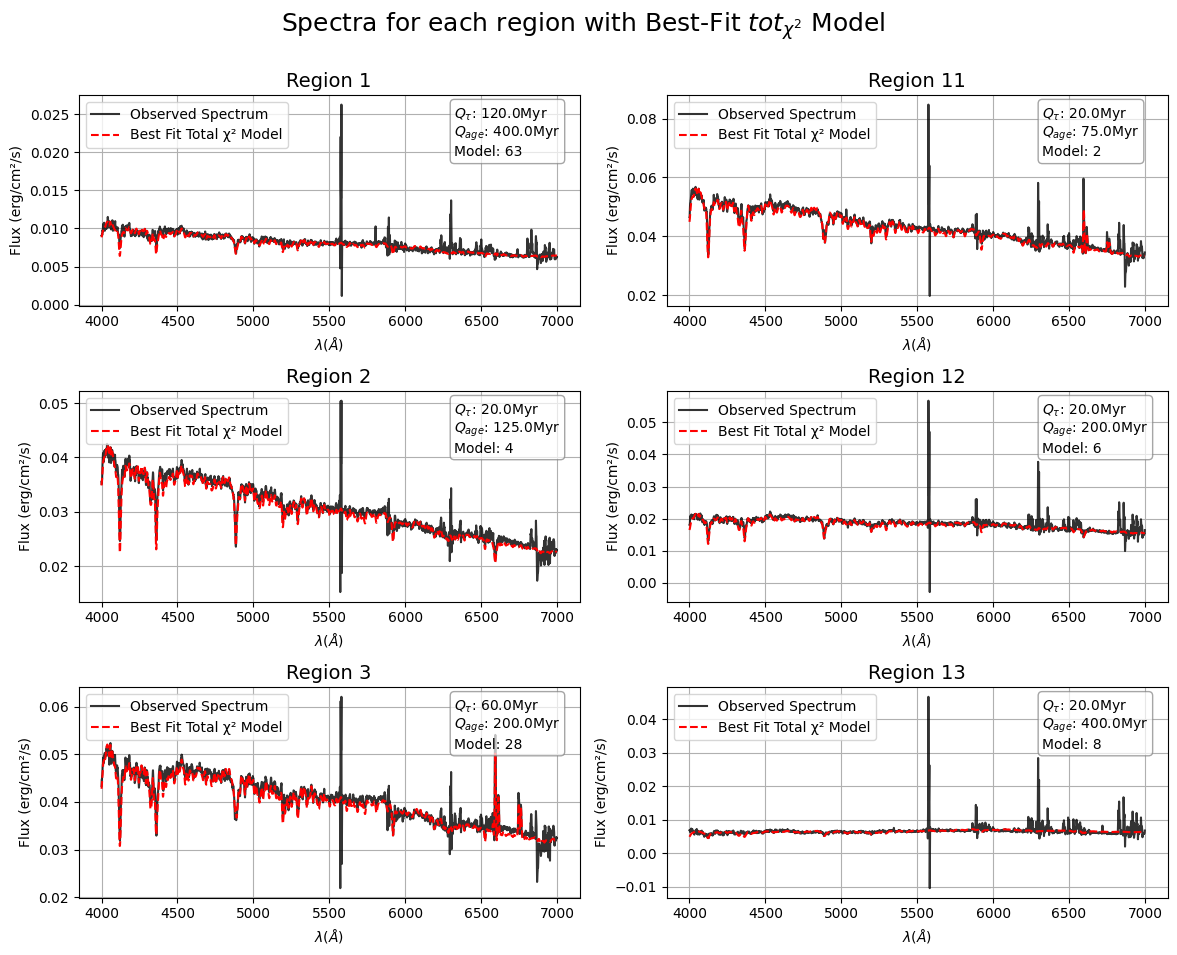

In [ ]:
import matplotlib.pyplot as plt
# Plot the spectra for the 6 regions with the best-fit model from the total chi-squared minimum
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle(r'Spectra for each region with Best-Fit $tot_{\chi^2}$ Model', fontsize=18)

for idx, j in enumerate(regionid):
    col = idx // 3
    row = idx % 3

    # Observed data
    specflx_j = spec_i[idx][0].data
    specwav_j = spec_i[idx][2].data

    # Best-fit model from total chi-squared minimum
    best_fit_index = index_mintot_v[idx] # Index corresponding to the min of log(chi2_spec + chi2_photo)
    modspec_best_fit = modhdu_i[idx][best_fit_index + 1].data
    modwave_best_fit = modhdu_i[idx][0].data
    rap_best_fit = rap_i_arr[best_fit_index] # Scaling factor for this model

    axes[row, col].plot(specwav_j, specflx_j, label="Observed Spectrum", color='black', alpha=0.8)
    axes[row, col].plot(modwave_best_fit[0], modspec_best_fit[0] / rap_best_fit, color='red', linestyle='--', label='Best Fit Total χ² Model')

    axes[row, col].set_xlabel('$\lambda (\AA)$')
    axes[row, col].set_ylabel('Flux (erg/cm²/s)')
    axes[row, col].set_title(f'Region {j}', fontsize=14)
    axes[row, col].legend(loc='upper left')
    axes[row, col].grid(True)

    # Add text annotation for Q_age, Q_tau, and best-fit model index
    qtau_val = Qtau_arr[best_fit_index]
    qage_val = Qage_arr[best_fit_index]
    model_index = best_fit_index + 1 # Model index is 1-based

    text_str = f'$Q_\\tau$: {qtau_val}Myr\n$Q_{{age}}$: {qage_val}Myr\nModel: {model_index}'
    axes[row, col].text(0.75, 0.95, text_str, transform=axes[row, col].transAxes,
                        fontsize=10, verticalalignment='top', horizontalalignment='left',
                        bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', alpha=0.7))


fig.tight_layout(rect=[0.01, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap

plt.savefig('9_all_regions_spectra_best_total_chisq.png')
files.download('9_all_regions_spectra_best_total_chisq.png')

plt.show()

Both plots show you the "goodness of fit" of different models in the Qtau vs Qage parameter space, but one is based on how well the model fits the photometry, and the other is based on how well it fits the spectrum. By looking at where the lowest chi-squared values are located in these plots, you can identify the combinations of Qtau and Qage that best describe the stellar population history of the galaxy in that particular region, according to either the photometric or spectroscopic data. The fact that the plots are relative to the minimum chi-squared helps you easily see which models are close to the best fit.

- dallo spettro ho gli assorbimenti Balmer che sono caratteristici delle stelle A
- dalla fotometria ho informazioni delle stelle o e B (nell'uv), quindi amplio l'osservazione "delle età stellari"

- WHEN SF IS REMOVED (AGE) AND HOW FAST(TAU)
- outer reagions has been stripped (SF decay) way before the inner reagions and suddently as soon as the galaxy "stars falling"
- ..covariance in the parameter..